# RAMLfications

### Lynn Root
### Backend Engineer @ Spotify
### @roguelynn

# What Is RAML?

RAML stands for RESTful API Modeling Language. 

Very similar to Swagger and Blueprint, it's used to describe REST APIs.

What it looks like:

```yaml
#%RAML 0.8
title: Spotify Web API
version: v1
baseUri: https://api.spotify.com/{version}
mediaType: application/json
documentation:
  - title: Spotify Web API Docs
    content: |
      Welcome to the _Spotify Web API_ specification. For more information about
      how to use the API, check out [developer site](https://developer.spotify.com/web-api/).
/albums:
  displayName: several-albums
  get:
    description: |
      [Get Several Albums](https://developer.spotify.com/web-api/get-several-albums/)
    queryParameters:
      ids:
        displayName: Spotify Album IDs
        type: string
        description: A comma-separated list of IDs
        required: true
        example: "382ObEPsp2rxGrnsizN5TX,1A2GTWGtFfWp7KSQTwWOyo,2noRn2Aes5aoNVsU6iWThc"
      market:
        displayName: Market
        description: The market (an ISO 3166-1 alpha-2 country code)
        type: string
        example: ES
        required: false
    responses:
      200:
        body:
          application/json:
            example: !include example/get-albums-example.json  
        
```

# Why?

## Why a description language for your API?

* Have a single source-of-truth reference for your API

* Machine & human-ish readable

* Clear definition of own versioned API specification

## Why RAML?

* not limited to describing in JSON (Swagger only supports JSON Schema)

* Can support different API versioning (Blueprint can as well)

* Include sample representations (Blueprint can as well)

* Allows for including of external files from either local filesystem or via an HTTP request - no need for one massive `.raml` file (Neither Swagger nor Blueprints supports this)

* It's not WADL

## Why did Spotify choose RAML

* "new kid on the block" & very active development - also means it's very young

* more readable from our PoV
    * actual syntax & file structure
    * external file inclusions 

* open-source spec

# Setting the scene

### I hated answering repeated questions

### So I built a thing

### It takes our RAML file

### And makes an interactive console

In [3]:
from IPython.display import Image

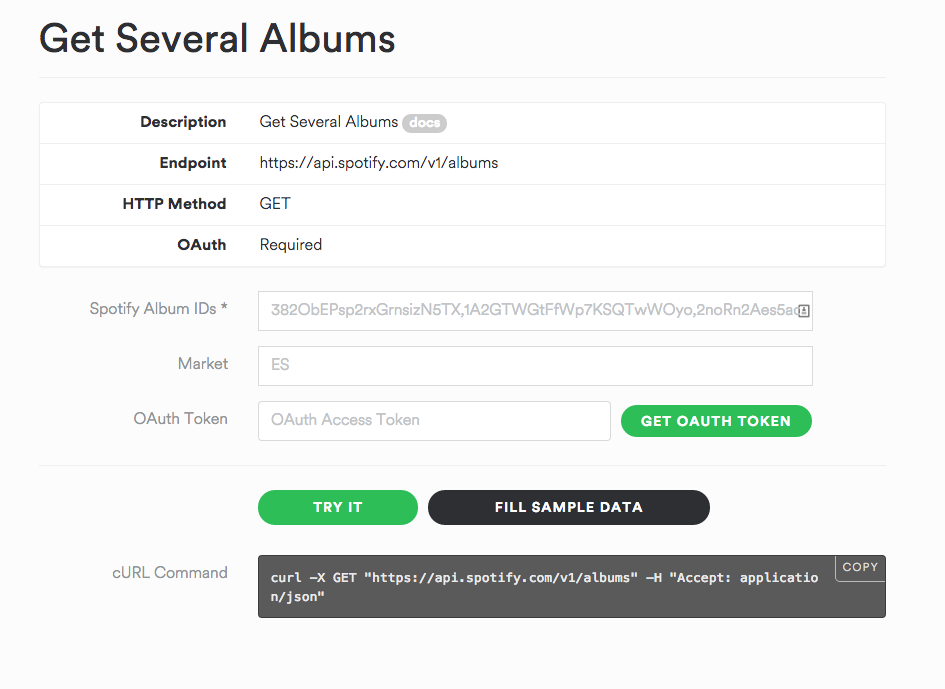

In [4]:
Image(filename='api-console-snapshot.png')

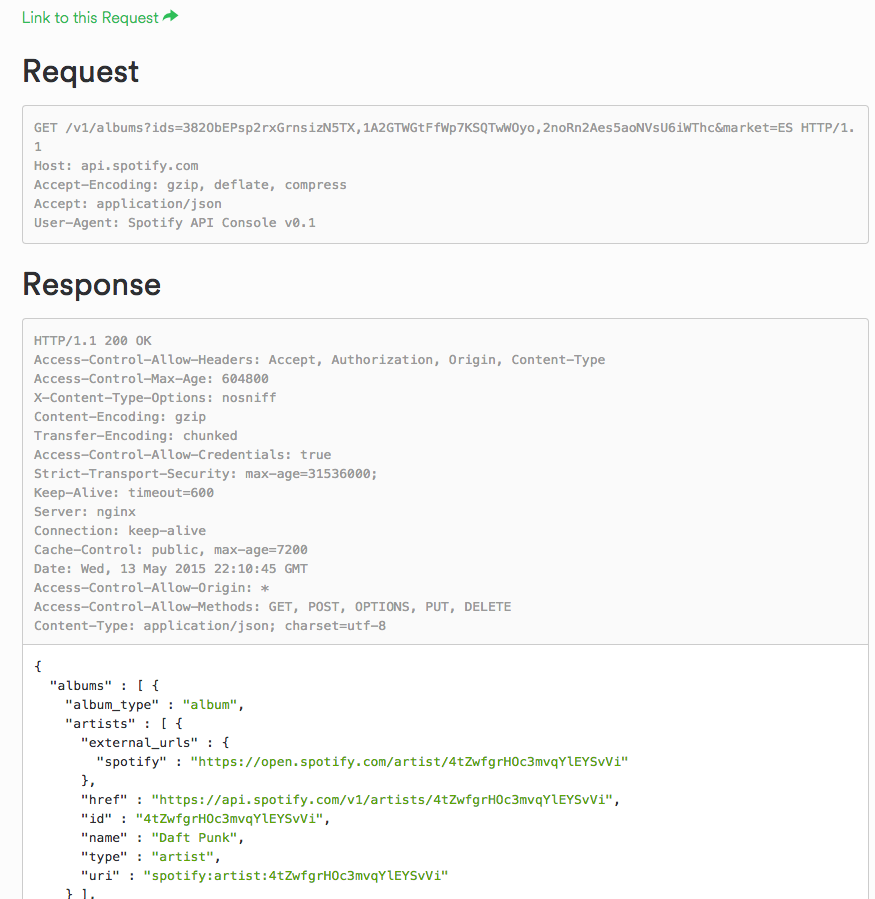

In [6]:
Image(filename='api-console-snapshot-resp.png')

# enter: RAMLfications

### TL;DR: Python reference implementation for RAML

Let's play:

```bash
$ pip install ramlfications
```


In [7]:
!pip install ramlfications

Downloading/unpacking ramlfications
Downloading/unpacking click (from ramlfications)
Downloading/unpacking six (from ramlfications)
Downloading/unpacking termcolor (from ramlfications)
  Running setup.py (path:/Users/lynnroot/.virtualenvs/raml-lt/build/termcolor/setup.py) egg_info for package termcolor
    
Downloading/unpacking markdown2 (from ramlfications)
  Running setup.py (path:/Users/lynnroot/.virtualenvs/raml-lt/build/markdown2/setup.py) egg_info for package markdown2
    
Downloading/unpacking xmltodict (from ramlfications)
  Running setup.py (path:/Users/lynnroot/.virtualenvs/raml-lt/build/xmltodict/setup.py) egg_info for package xmltodict
    
Downloading/unpacking pyyaml (from ramlfications)
  Running setup.py (path:/Users/lynnroot/.virtualenvs/raml-lt/build/pyyaml/setup.py) egg_info for package pyyaml
    
Downloading/unpacking attrs (from ramlfications)
  Running setup.py install for termcolor
    
  Running setup.py install for markdown2
    changing mode of build/script

# using RAMLfications within your library

In [8]:
from ramlfications import parse

In [16]:
RAML_FILE = "spotify-web-api.raml"
api = parse(RAML_FILE)

In [17]:
api

RootNode(title='Spotify Web API')

In [29]:
#metadata
api.title

'Spotify Web API'

In [19]:
api.version

'v1'

In [30]:
api.base_uri

'https://api.spotify.com/v1'

In [67]:
api.protocols

['HTTPS']

In [28]:
# security schemes
api.security_schemes

[SecurityScheme(name='oauth_2_0')]

In [27]:
oauth = api.security_schemes[0]
oauth.settings.get("scopes")

['playlist-read-private',
 'playlist-modify-public',
 'playlist-modify-private',
 'user-library-read',
 'user-library-modify',
 'user-read-private',
 'user-read-birthdate',
 'user-read-email',
 'user-follow-read',
 'user-follow-modify']

In [31]:
# API endpoints
res = api.resources
res

[ResourceNode(method='get', path='/albums'),
 ResourceNode(method='get', path='/albums/{id}'),
 ResourceNode(method='get', path='/albums/{id}/tracks'),
 ResourceNode(method='get', path='/artists'),
 ResourceNode(method='get', path='/artists/{id}'),
 ResourceNode(method='get', path='/artists/{id}/top-tracks'),
 ResourceNode(method='get', path='/artists/{id}/related-artists'),
 ResourceNode(method='get', path='/artists/{id}/albums'),
 ResourceNode(method='get', path='/tracks'),
 ResourceNode(method='get', path='/tracks/{id}'),
 ResourceNode(method='get', path='/search'),
 ResourceNode(method='get', path='/me'),
 ResourceNode(method='get', path='/me/tracks'),
 ResourceNode(method='put', path='/me/tracks'),
 ResourceNode(method='delete', path='/me/tracks'),
 ResourceNode(method='get', path='/me/tracks/contains'),
 ResourceNode(method='get', path='/users/{user_id}'),
 ResourceNode(method='get', path='/users/{user_id}/playlists'),
 ResourceNode(method='post', path='/users/{user_id}/playlists

In [36]:
get_an_album = res[1]
get_an_album.uri_params

[URIParameter(name='id')]

In [54]:
get_an_album.method

'get'

In [55]:
get_an_album.description

[Get an Album](https://developer.spotify.com/web-api/get-album/)

In [56]:
get_an_album.description.html

u'<p><a href="https://developer.spotify.com/web-api/get-album/">Get an Album</a></p>\n'

In [58]:
get_an_album.display_name

'album'

In [68]:
get_an_album.path

'/albums/{id}'

In [69]:
get_an_album.absolute_uri

'https://api.spotify.com/v1/albums/{id}'

In [70]:
# parameters
uri_param = get_an_album.uri_params[0]
uri_param.name

'id'

In [40]:
uri_param.required

True

In [41]:
uri_param.example

'4aawyAB9vmqN3uQ7FjRGTy'

In [42]:
get_an_album.parent

ResourceNode(method='get', path='/albums')

In [71]:
# API traits
api.traits

[TraitNode(name='filterable'), TraitNode(name='paged')]

In [72]:
paged = api.traits[1]
paged.query_params

[QueryParameter(name='limit'), QueryParameter(name='offset')]

In [73]:
query_param = _[0]

In [74]:
query_param.name

'limit'

In [75]:
query_param.raw

OrderedDict([('displayName', 'Limit'), ('description', 'The maximum number of track objects to return'), ('type', 'integer'), ('example', 10), ('minimum', 0), ('default', 20), ('maximum', 50), ('required', False)])

# fun from the command line

### validate your RAML file

In [81]:
!ramlfications validate spotify-web-api.raml

Success! Valid RAML file: spotify-web-api.raml


In [82]:
!ramlfications validate invalid.raml

Error validating file invalid.raml: 'FTP' not a valid protocol for a RAML-defined API.


## Your API does in fact support FTP?

Just add it to your config file!

```bash
$ cat raml_config.ini
```

```ini
[custom]
protocols = FTP
```


In [84]:
!ramlfications validate --config raml_config.ini invalid.raml

Success! Valid RAML file: invalid.raml


### visualize your RAML file

In [76]:
!ramlfications tree spotify-web-api.raml

Spotify Web API
Base URI: https://api.spotify.com/v1
|- /albums
|  - /albums/{id}
|    - /albums/{id}/tracks
|- /artists
|  - /artists/{id}
|    - /artists/{id}/top-tracks
|    - /artists/{id}/related-artists
|    - /artists/{id}/albums
|- /tracks
|  - /tracks/{id}
|- /search
|- /me
|  - /me/tracks
|  - /me/tracks
|  - /me/tracks
|    - /me/tracks/contains
|- /users/{user_id}
|- /users/{user_id}/playlists
|- /users/{user_id}/playlists
|  - /users/{user_id}/playlists/{playlist_id}
|  - /users/{user_id}/playlists/{playlist_id}
|    - /users/{user_id}/playlists/{playlist_id}/tracks
|    - /users/{user_id}/playlists/{playlist_id}/tracks
|    - /users/{user_id}/playlists/{playlist_id}/tracks
|    - /users/{user_id}/playlists/{playlist_id}/tracks
|    - /users/{user_id}/playlists/{playlist_id}/followers
|    - /users/{user_id}/playlists/{playlist_id}/followers
|      - /users/{user_id}/playlists/{playlist_id}/followers/contains

|- /browse/featured-playlists
|- /browse/categories
|  - /brows

In [78]:
# MOAR!
!ramlfications tree spotify-web-api.raml -v

Spotify Web API
Base URI: https://api.spotify.com/v1
|- /albums
|  ⌙ GET
|  - /albums/{id}
|    ⌙ GET
|    - /albums/{id}/tracks
|      ⌙ GET
|- /artists
|  ⌙ GET
|  - /artists/{id}
|    ⌙ GET
|    - /artists/{id}/top-tracks
|      ⌙ GET
|    - /artists/{id}/related-artists
|      ⌙ GET
|    - /artists/{id}/albums
|      ⌙ GET
|- /tracks
|  ⌙ GET
|  - /tracks/{id}
|    ⌙ GET
|- /search
|  ⌙ GET
|- /me
|  ⌙ GET
|  - /me/tracks
|    ⌙ GET
|  - /me/tracks
|    ⌙ PUT
|  - /me/tracks
|    ⌙ DELETE
|    - /me/tracks/contains
|      ⌙ GET
|- /users/{user_id}
|  ⌙ GET
|- /users/{user_id}/playlists
|  ⌙ GET
|- /users/{user_id}/playlists
|  ⌙ POST
|  - /users/{user_id}/playlists/{playlist_id}
|    ⌙ GET
|  - /users/{user_id}/playlists/{playlist_id}
|    ⌙ PUT
|    - /users/{user_id}/playlists/{playlist_id}/tracks
|      ⌙ GET
|    - /users/{user_id}/playlists/{playlist_id}/tracks
|      ⌙ POST
|    - /users/{user_id}/playlists/{playlist_id}/tracks
|      ⌙ PUT
|    - /users/{user_id}/playlists/{

In [79]:
# I want MOAR
!ramlfications tree spotify-web-api.raml -vv

Spotify Web API
Base URI: https://api.spotify.com/v1
|- /albums
|  ⌙ GET
|     Query Params
|      ⌙ ids
|      ⌙ market
|  - /albums/{id}
|    ⌙ GET
|       Query Params
|        ⌙ market
|       URI Params
|        ⌙ id
|    - /albums/{id}/tracks
|      ⌙ GET
|         Query Params
|          ⌙ limit
|          ⌙ offset
|          ⌙ market
|         URI Params
|          ⌙ id
|- /artists
|  ⌙ GET
|     Query Params
|      ⌙ ids
|  - /artists/{id}
|    ⌙ GET
|       URI Params
|        ⌙ id
|    - /artists/{id}/top-tracks
|      ⌙ GET
|         Query Params
|          ⌙ country
|         URI Params
|          ⌙ id
|    - /artists/{id}/related-artists
|      ⌙ GET
|         URI Params
|          ⌙ id
|    - /artists/{id}/albums
|      ⌙ GET
|         Query Params
|          ⌙ limit
|          ⌙ offset
|          ⌙ album_type
|          ⌙ market
|         URI Params
|          ⌙ id
|- /tracks
|  ⌙ GET
|     Query Params
|      ⌙ ids
|      ⌙ market
|  - /tracks/{id}
|    ⌙ GET
|       Q

In [80]:
# I WANT MOOOOARRRRR
!ramlfications tree spotify-web-api.raml -vvv

Spotify Web API
Base URI: https://api.spotify.com/v1
|- /albums
|  ⌙ GET
|     Query Params
|      ⌙ ids: Spotify Album IDs
|      ⌙ market: Market
|  - /albums/{id}
|    ⌙ GET
|       Query Params
|        ⌙ market: Market
|       URI Params
|        ⌙ id: Spotify Album ID
|    - /albums/{id}/tracks
|      ⌙ GET
|         Query Params
|          ⌙ limit: Limit
|          ⌙ offset: Offset
|          ⌙ market: Market
|         URI Params
|          ⌙ id: Spotify Album ID
|- /artists
|  ⌙ GET
|     Query Params
|      ⌙ ids: Spotify Artist IDs
|  - /artists/{id}
|    ⌙ GET
|       URI Params
|        ⌙ id: Spotify Artist ID
|    - /artists/{id}/top-tracks
|      ⌙ GET
|         Query Params
|          ⌙ country: Country
|         URI Params
|          ⌙ id: Spotify Artist ID
|    - /artists/{id}/related-artists
|      ⌙ GET
|         URI Params
|          ⌙ id: Spotify Artist ID
|    - /artists/{id}/albums
|      ⌙ GET
|         Query Params
|          ⌙ limit: Limit
|          ⌙ offset:

# What's next?

Coming soon: 

* Documentation generator based off of RAML

* API console

# FIN

### Docs: ramlfications.readthedocs.org
### Code: github.com/spotify/ramlfications
### Slides: rogue.ly/ramlfications

### Thanks!